In [18]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [19]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pickle
import pandas as pd
import random
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

In [21]:
np.random.seed(0)

In [22]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'],train_data['labels']

X_val, y_val = val_data['features'],val_data['labels']

X_test, y_test = test_data['features'],test_data['labels']

y_train.shape = (34799, 1)


<class 'dict'>


In [23]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [24]:
classification = ['20km/h', '30km/h', '50km/h', '60km/h', '70km/h', '80km/h', 'End of speed limit (80km/h)', '100km/h','120km/h',
                  'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road',
                  'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry','General caution',
                  'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
                  ' Road work', 'Traffic signals', 'Pedestrians','Children crossing',
                  'Bicycles crossing', ' Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead',
                  'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left','Keep right',
                  'Keep left', ' Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric ...']

index = 0
print('The image class is: ', classification[y_train[index][0]])
print(y_train)




y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

print(y_train_one_hot)

print('The one hot label is:', y_train_one_hot[0])

The image class is:  End of no passing
[[41]
 [41]
 [41]
 ...
 [25]
 [25]
 [25]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [25]:
datagen =ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)

datagen.fit(X_train)  #can be removed

batches = datagen.flow(X_train,y_train,batch_size=20)

X_batch,y_batch =next(batches)

X_train = X_train / 255
X_test = X_test / 255
X_val =X_val/255

In [26]:
input_layer=Input(shape=(32,32,3))

x1 = Conv2D(
        filters=60,
        kernel_size=[5, 5],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu )(input_layer)

x1 = Conv2D(
        filters=60,
        kernel_size=[5, 5],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu )(x1)

x1 = Conv2D(
        filters=60,
        kernel_size=[5, 5],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu )(x1)

x1 = BatchNormalization()(x1)

x1=MaxPooling2D(pool_size=(2, 2))(x1)

x1 = Flatten()(x1)

x2 = Conv2D(
        filters=60,
        kernel_size=[5, 5],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu )(input_layer)

x2 = Conv2D(
        filters=60,
        kernel_size=[5, 5],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu )(x2)

x2 = Conv2D(
        filters=60,
        kernel_size=[5, 5],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu )(x2)

x2 = BatchNormalization()(x2)

x2=MaxPooling2D(pool_size=(2, 2))(x2)

x2 = Conv2D(
        filters=30,
        kernel_size=[3, 3],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu)(x2)

x2 = Conv2D(
        filters=30,
        kernel_size=[3, 3],
        kernel_initializer='he_uniform',
        bias_initializer=tf.keras.initializers.Constant(value=0),
        padding="same",
        activation=tf.nn.relu)(x2)

x2 = BatchNormalization()(x2)

x2=MaxPooling2D(pool_size=(2, 2))(x2)

x2 = Dropout(0.5)(x2)

x2 = Flatten()(x2)

x = Concatenate(axis=-1)([x1,x2])

x = Dense(500 ,activation='relu')(x)

x = Dropout(0.5)(x)

x = Dense(43,activation='softmax')(x)

conv_model = Model(input_layer,x)
optimizer = tf.keras.optimizers.Adam(0.001)

conv_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print(conv_model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 32, 32, 60)     │          4,560 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 32, 32, 60)     │         90,060 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 32, 32, 60)     │         90,060 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 60)     │            240 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 16, 16, 60)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 60)     │          4,560 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 16, 16, 30)     │         16,230 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 60)     │         90,060 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 16, 16, 30)     │          8,130 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 60)     │         90,060 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 16, 16, 30)     │            120 │ conv2d_15[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 60)     │            240 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 8, 8, 30)       │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 60)     │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 8, 8, 30)       │              0 │ max_pooling2d_5[0][0]  │
├──────────────────────

 Total params: 9,056,363 (34.55 MB)

 Trainable params: 9,056,063 (34.55 MB)

 Non-trainable params: 300 (1.17 KB)

None


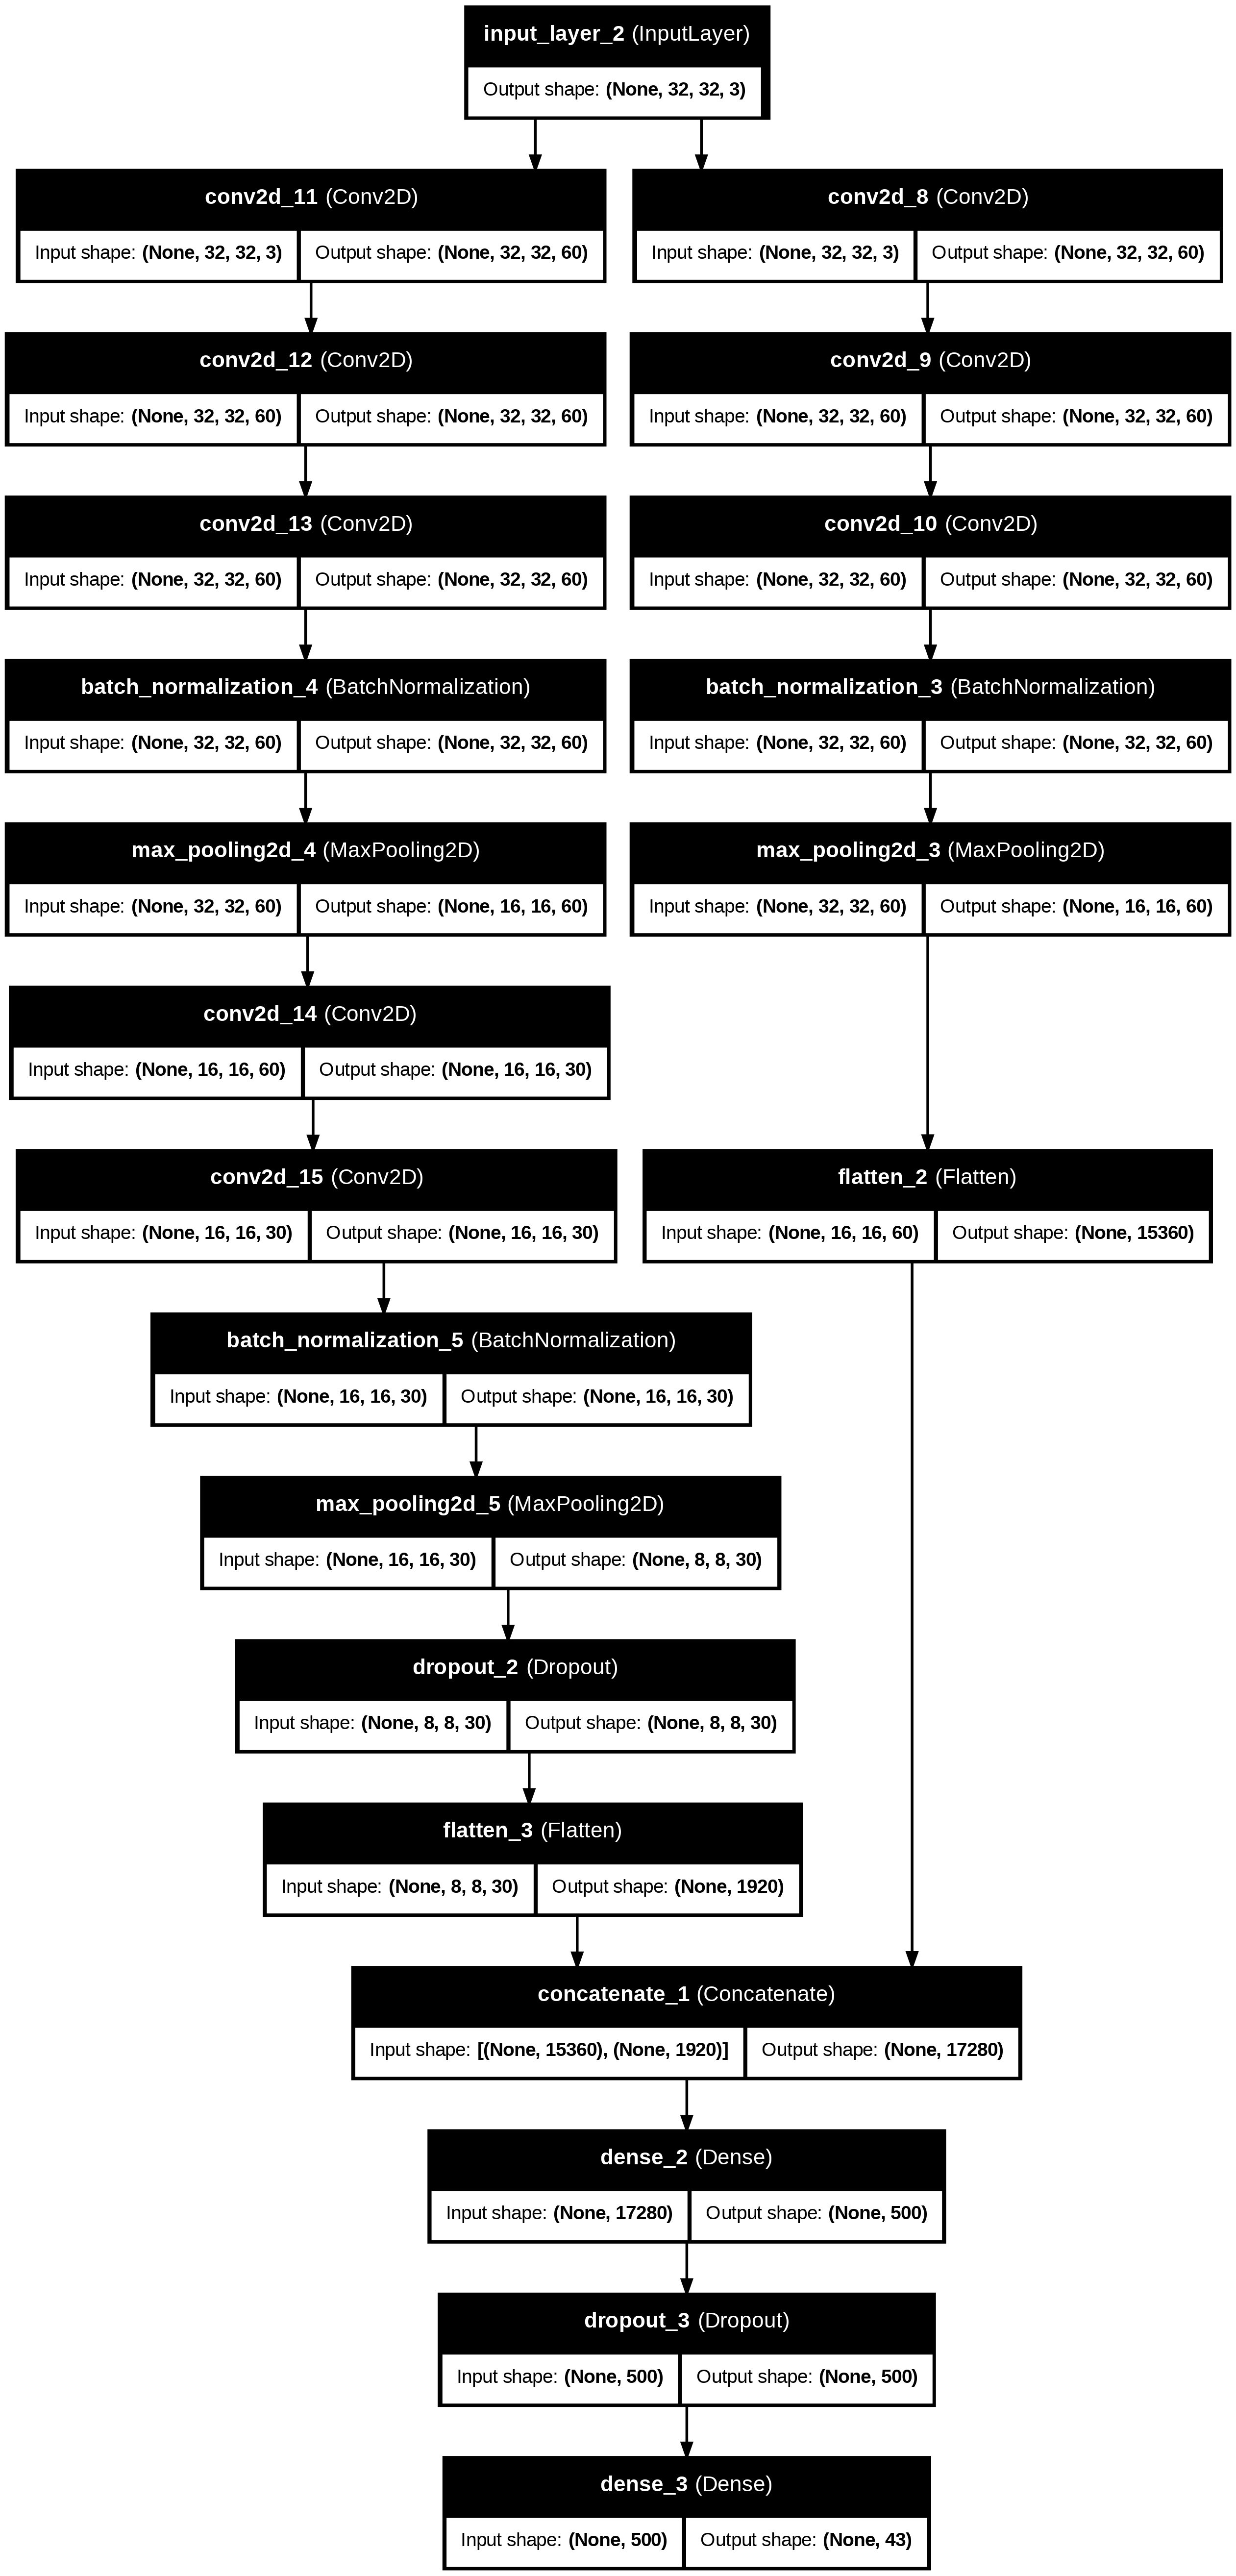

In [27]:
plot_model(conv_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

trained_model =conv_model.fit(X_train, y_train_one_hot,
           batch_size=512, epochs=50, validation_data =(X_val,y_val_one_hot),shuffle=True, callbacks=callbacks )

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2548s 37s/step - accuracy: 0.2587 - loss: 4.1276 - val_accuracy: 0.5274 - val_loss: 2.1125 - learning_rate: 0.0010
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2555s 38s/step - accuracy: 0.9099 - loss: 0.3032 - val_accuracy: 0.5984 - val_loss: 1.4290 - learning_rate: 0.0010
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2485s 37s/step - accuracy: 0.9805 - loss: 0.0694 - val_accuracy: 0.7544 - val_loss: 0.8909 - learning_rate: 0.0010
Epoch 4/50
 1/68 ━━━━━━━━━━━━━━━━━━━━ 1:41:49 91s/step - accuracy: 0.9902 - loss: 0.0337

In [ ]:
test_loss, test_acc = conv_model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_acc:.4f}")

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', pad=10)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
conv_model.save('my_model.h5')
conv_model.save_weights("model.h5")

In [ ]:
##start testing
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
 new_image = plt.imread("/content/drive/MyDrive/images/safari_1.jpg")

In [ ]:
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)
print(resized_image.shape)

In [ ]:
predictions = conv_model.predict(np.array( [resized_image] ))
predictions

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]
x = predictions
for i in range(43):
  for j in range(43):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

In [ ]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

In [ ]:
y_pred =np.argmax(conv_model.predict(X_test), axis=-1)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(confusion_matrix,figsize=(43,43), show_normed=True)